In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from categoricalhack import boxplot
figwidth=3.3
sns.set()
sns.set_palette('colorblind')
sns.set_context('paper', font_scale=0.75)
sns.set_style("whitegrid")
figsize=(figwidth, figwidth/1.5)
from categoricalhack import boxplot


def removeprefix(self: str, prefix: str, /) -> str:
    if self.startswith(prefix):
        return self[len(prefix):]
    else:
        return self[:]
%config InlineBackend.figure_format = 'retina'


In [40]:
nepisodes = 200000
path = f"logs/paperrun2/e{nepisodes}//"

shortname = ''.join(removeprefix(path, 'logs/').split('/'))
print(shortname)
figdir = "figures/" + shortname + "/"
os.makedirs(figdir, exist_ok=True)

paperrun2e200000


In [41]:
a = pd.read_csv(path+ "/ppobiglr/evalatend_log.csv.gz")
a["Algorithm"] = "PPO-MLP"
b = pd.read_csv(path+ "/cmafixed/evalatend_log.csv.gz")
b["Algorithm"] = "CMA-ES"
c = pd.read_csv("logs/paperrun3/bignetfastredo/evalatend_log.csv.gz")
c["Algorithm"] = "PPO-DEEP"
c = pd.concat((a, b, c))
c.groupby(["good_site_prob", "Algorithm"])["trial_id"].nunique()
c["p"] = c["good_site_prob"]

In [42]:
c

,Unnamed: 0,inv,other,accept,run_id,trial_id,good_site_prob,checkpoint_path,Algorithm,p
0,0,5.211583,12.5,0,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
1,1,5.210622,3.5,1,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
2,2,5.211958,4.5,1,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
3,3,5.207606,2.5,1,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
4,4,5.212956,10.0,0,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
...,...,...,...,...,...,...,...,...,...,...
1092647,3786,9.332860,12.0,1,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
1092648,3787,9.333066,7.0,1,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
1092649,3788,9.333034,2.0,0,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
1092650,3789,9.332210,13.0,1,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1


In [43]:
accept_other_val = []
for n, g in c.groupby(["Algorithm", "good_site_prob"]):
    accepted = pd.DataFrame(g.query("accept == 1")["other"].copy())
    accepted["p"] = n[1]
    accepted["Algorithm"] = n[0]
    accept_other_val.append(accepted)

In [44]:
allppo =  pd.concat(accept_other_val)
alg_order = ["CMA-ES", "PPO-DEEP", "PPO-MLP"]

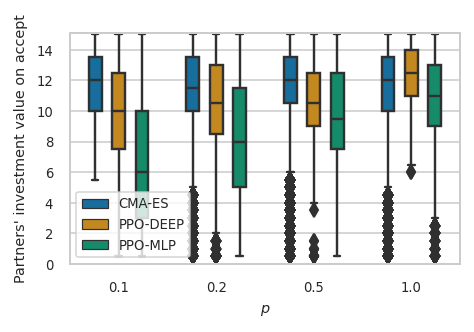

In [45]:
plt.figure(figsize=(figwidth, figwidth/1.5))
boxplot(data=allppo, x="p", y="other", hue="Algorithm", hue_order=alg_order, dodge=1.8, width=0.4)
plt.ylabel("Partners' investment value on accept")
plt.ylim(0, 15.1)
plt.xlabel("$p$")
#plt.legend(title="Algorithm", ncol=2)
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig(figdir + "/accept_boxplot.pdf")

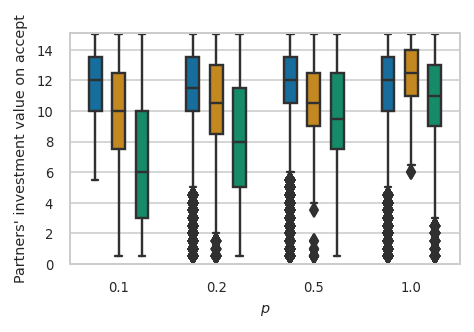

In [46]:
plt.figure(figsize=(figwidth, figwidth/1.5))
ax = boxplot(data=allppo, x="p", y="other", hue="Algorithm", hue_order=alg_order, dodge=1.8, width=0.4, labels=None)
plt.ylabel("Partners' investment value on accept")
plt.ylim(0, 15.1)
plt.xlabel("$p$")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig(figdir + "/accept_boxplot_no_label.pdf")

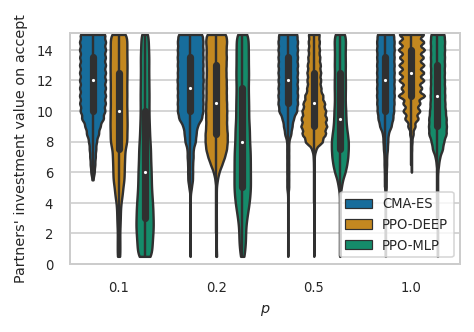

In [47]:
plt.figure(figsize=(figwidth, figwidth/1.5))
sns.violinplot(data=allppo, x="p", y="other", hue="Algorithm", hue_order=alg_order, bw=0.1, cut=0)
plt.ylabel("Partners' investment value on accept")
plt.ylim(0, 15.1)
plt.xlabel("$p$")
#plt.legend(title="Algorithm", ncol=2)
#plt.legend(bbox_to_anchor=(1, -0.15), ncol=2)
plt.legend()
plt.tight_layout()
plt.savefig(figdir + "/accept_violin.pdf")

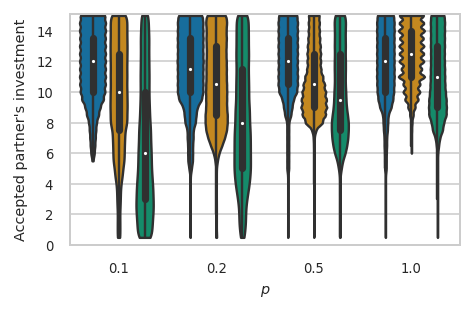

In [48]:
plt.figure(figsize=(figwidth, figwidth/1.5))
ax = sns.violinplot(data=allppo, x="p", y="other", hue="Algorithm", hue_order=alg_order, bw=0.1, cut=0)
plt.ylabel("Accepted partner's investment")
plt.ylim(0, 15.1)
plt.xlabel("$p$")
#plt.legend(title="Algorithm", ncol=2)
ax.get_legend().remove()

#plt.legend(bbox_to_anchor=(1, -0.3), ncol=2)
plt.tight_layout()
plt.savefig(figdir + "/accept_violin_nolabel.pdf")

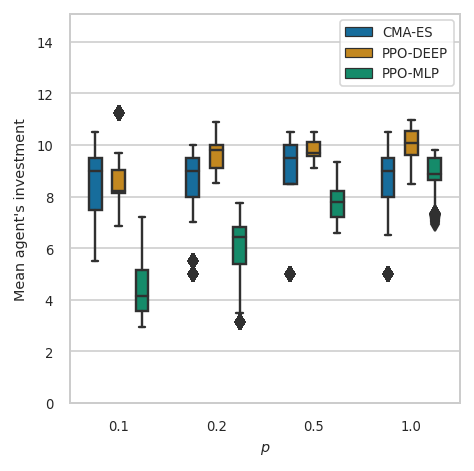

In [49]:
plt.figure(figsize=(figwidth, figwidth))

boxplot(data=c, x="p", y="inv", hue="Algorithm", dodge=1.8, width=0.4, hue_order=alg_order)
plt.ylabel("Mean agent's investment")
plt.xlabel("$p$")
plt.ylim(0, 15.1)
plt.legend()
plt.tight_layout()
plt.savefig(figdir + "/invest_boxplot.pdf")

In [50]:
cmean = c.groupby(["p", "Algorithm", "run_id"], as_index=False).mean()
cmean

,p,Algorithm,run_id,Unnamed: 0,inv,other,accept,good_site_prob
0,0.1,CMA-ES,0,14260.0,8.000000,7.728674,0.497879,0.1
1,0.1,CMA-ES,1,14563.0,8.500000,7.775861,0.468466,0.1
2,0.1,CMA-ES,2,15180.0,10.000000,7.717829,0.361879,0.1
3,0.1,CMA-ES,3,14314.5,9.500000,7.747782,0.400629,0.1
4,0.1,CMA-ES,4,17035.5,7.500000,7.764323,0.529291,0.1
...,...,...,...,...,...,...,...,...
235,1.0,PPO-MLP,19,5088.0,9.774185,7.703302,0.420556,1.0
236,1.0,PPO-MLP,20,6652.0,9.128277,7.776287,0.475460,1.0
237,1.0,PPO-MLP,21,4984.5,9.583926,7.707523,0.461986,1.0
238,1.0,PPO-MLP,22,7848.0,8.696220,7.738676,0.494426,1.0


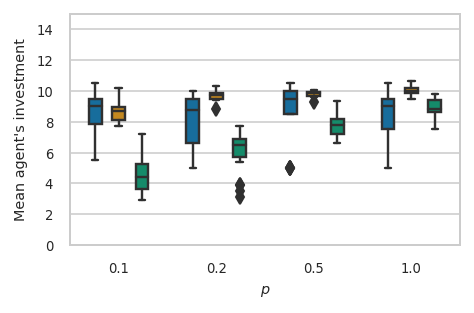

In [51]:
plt.figure(figsize=(figwidth, figwidth/1.5))

ax = boxplot(data=cmean, x="p", y="inv", hue="Algorithm", dodge=1.8, width=0.4, hue_order=alg_order)
plt.ylabel("Mean agent's investment")
plt.xlabel("$p$")
plt.ylim(0, 15)
ax.get_legend().remove()
plt.tight_layout()
plt.savefig(figdir + "/invest_boxplot_no_label.pdf")

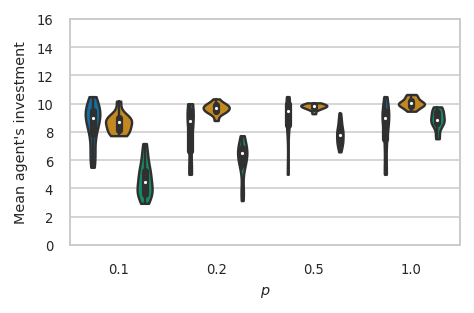

In [52]:
plt.figure(figsize=(figwidth, figwidth/1.5))

ax = sns.violinplot(data=cmean, x="p", y="inv", hue="Algorithm", dodge=1.3, hue_order=alg_order, cut=0)
plt.ylabel("Mean agent's investment")
plt.xlabel("$p$")
plt.ylim(0, 16)
ax.get_legend().remove()
plt.tight_layout()
plt.savefig(figdir + "/invest_violinplot_no_label.pdf")

figures/paperrun2e200000/


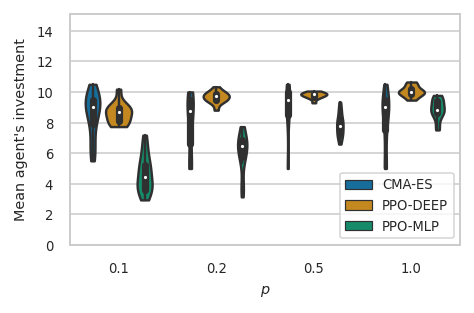

In [59]:
plt.figure(figsize=(figwidth, figwidth/1.5))

ax = sns.violinplot(data=cmean, x="p", y="inv", hue="Algorithm", dodge=1.3, hue_order=alg_order, cut=0)
plt.ylabel("Mean agent's investment")
plt.xlabel("$p$")
plt.ylim(0, 15.1)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(figdir + "/invest_violinplot.pdf")
print(figdir)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.1_CMA-ES v.s. 0.1_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=5.114e-01 U_stat=1.640e+02
0.1_PPO-DEEP v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=1.468e-06 U_stat=2.880e+02
0.1_CMA-ES v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=2.065e-08 U_stat=5.600e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.2_PPO-DEEP v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=1.468e-06 U_stat=2.880e+02
0.2_CMA-ES v.s. 0.2_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=7.257e-03 U_stat=6.400e+01
0.2_CMA-ES v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=6.714e-04 U_stat=4.530e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-0

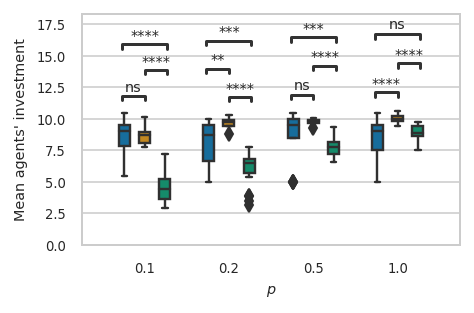

In [54]:
from statannot import add_stat_annotation

plt.figure(figsize=(figwidth, figwidth/1.5))

ax = boxplot(data=cmean, x="p", y="inv", hue="Algorithm", dodge=1.8, width=0.4, hue_order=alg_order)
plt.ylabel("Mean agents' investment")
plt.xlabel("$p$")
plt.ylim(0, 16)
ax.get_legend().remove()
for p in [0.1, 0.2, 0.5, 1.0]:
    add_stat_annotation(ax, data=cmean, x="p", y="inv", hue="Algorithm", hue_order=["CMA-ES", "PPO-DEEP", "PPO-MLP"], verbose=2, test="Mann-Whitney",
                        box_pairs=[((p, "PPO-MLP"), (p, "CMA-ES")), ((p, "PPO-DEEP"), (p, "CMA-ES")), ((p, "PPO-MLP"), (p, "PPO-DEEP"))], comparisons_correction=None, text_format="star")
#plt.text(0, 0, "must do bonferri?")
plt.tight_layout()
#plt.savefig(figdir + "/invest_boxplot_no_label.pdf")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.1_CMA-ES v.s. 0.1_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=0.000e+00 U_stat=1.418e+10
0.1_PPO-DEEP v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=0.000e+00 U_stat=2.771e+09
0.1_CMA-ES v.s. 0.1_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=0.000e+00 U_stat=1.643e+10
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.2_PPO-DEEP v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=0.000e+00 U_stat=2.938e+09
0.2_CMA-ES v.s. 0.2_PPO-DEEP: Mann-Whitney-Wilcoxon test two-sided, P_val=0.000e+00 U_stat=1.072e+10
0.2_CMA-ES v.s. 0.2_PPO-MLP: Mann-Whitney-Wilcoxon test two-sided, P_val=0.000e+00 U_stat=1.688e+10
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-0

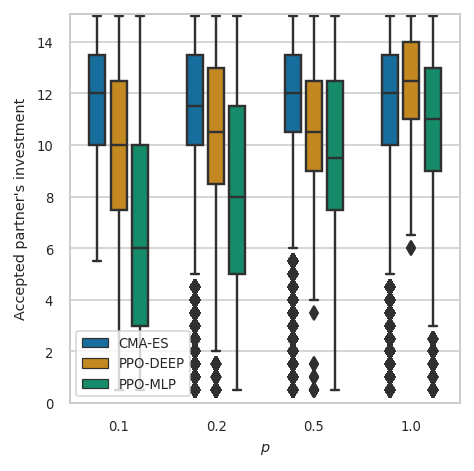

In [55]:
plt.figure(figsize=(figwidth, figwidth))
boxplot(data=allppo, x="p", y="other", hue="Algorithm", hue_order=alg_order, dodge=1.3, width=0.5)
plt.ylabel("Accepted partner's investment")
plt.ylim(0, 15.1)
plt.xlabel("$p$")
#plt.legend(title="Algorithm", ncol=2)
plt.legend(loc="lower left")
#add_stat_annotation(ax, data=allppo, x="p", y="other", hue="Algorithm", hue_order=alg_order, verbose=2, test="Mann-Whitney",
#                    box_pairs=[((p, "PPO"), (p, "CMA-ES")) for p in [0.1, 0.2, 0.5, 1.0]], comparisons_correction=None, text_format="star")
for p in [0.1, 0.2, 0.5, 1.0]:
    add_stat_annotation(ax, data=allppo, x="p", y="other", hue="Algorithm", hue_order=["CMA-ES", "PPO-DEEP", "PPO-MLP"], verbose=2, test="Mann-Whitney",
                        box_pairs=[((p, "PPO-MLP"), (p, "CMA-ES")), ((p, "PPO-DEEP"), (p, "CMA-ES")), ((p, "PPO-MLP"), (p, "PPO-DEEP"))], comparisons_correction=None, text_format="star")

plt.tight_layout()
#plt.savefig(figdir + "/accept_boxplot.pdf")

In [56]:
c.query("accept == 1").groupby(["Algorithm", "p"]).count()

Unnamed: 0     inv   other  accept  run_id  trial_id  \
Algorithm p                                                           
CMA-ES    0.1      332431  332431  332431  332431  332431    332431   
          0.2      314054  314054  314054  314054  314054    314054   
          0.5      278167  278167  278167  278167  278167    278167   
          1.0      307332  307332  307332  307332  307332    307332   
PPO-DEEP  0.1       65093   65093   65093   65093   65093     65093   
          0.2       58761   58761   58761   58761   58761     58761   
          0.5       59599   59599   59599   59599   59599     59599   
          1.0      158031  158031  158031  158031  158031    158031   
PPO-MLP   0.1       59770   59770   59770   59770   59770     59770   
          0.2       72800   72800   72800   72800   72800     72800   
          0.5       76662   76662   76662   76662   76662     76662   
          1.0      100381  100381  100381  100381  100381    100381   

               good_site_prob  checkpoint_path  
Algorithm p                                     
CMA-ES    0.1          332431           332431  
          0.2          314054           314054  
          0.5          278167           278167  
          1.0          307332           307332  
PPO-DEEP  0.1           65093            65093  
          0.2           58761            58761  
          0.5           59599            59599  
          1.0          158031           158031  
PPO-MLP   0.1           59770            59770  
          0.2           72800            72800  
          0.5           76662            76662  
          1.0          100381           100381

In [60]:
c

,Unnamed: 0,inv,other,accept,run_id,trial_id,good_site_prob,checkpoint_path,Algorithm,p
0,0,5.211583,12.5,0,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
1,1,5.210622,3.5,1,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
2,2,5.211958,4.5,1,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
3,3,5.207606,2.5,1,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
4,4,5.212956,10.0,0,10,3c19e_00010,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-MLP,0.1
...,...,...,...,...,...,...,...,...,...,...
1092647,3786,9.332860,12.0,1,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
1092648,3787,9.333066,7.0,1,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
1092649,3788,9.333034,2.0,0,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
1092650,3789,9.332210,13.0,1,9,c3315_00009,0.1,/Users/paulecoffet/Documents/isir/These/data/R...,PPO-DEEP,0.1
